<a href="https://colab.research.google.com/github/Oloche1/Drilling_Density_and_Data_Confidence.ipynb/blob/main/Drilling_Density_and_Data_Confidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Core numerical and data-handling libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

plt.style.use("default")


In [2]:
# Load the drillhole dataset
drillholes = pd.read_csv("DRILLHOLES.csv")

print("Data loaded successfully.")


Data loaded successfully.


In [3]:
# Number of rows and columns
print("Dataset shape (rows, columns):")
print(drillholes.shape)


Dataset shape (rows, columns):
(317923, 12)


In [4]:
# Inspect column names and data types
print("\nColumn names and data types:")
drillholes.info()



Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317923 entries, 0 to 317922
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HOLE_ID     317923 non-null  int64  
 1   HOLE_NAME   317923 non-null  object 
 2   METHOD      317923 non-null  object 
 3   TYPE        317923 non-null  object 
 4   TOTALDEPTH  317923 non-null  float64
 5   LONGITUDE   317923 non-null  float64
 6   LATITUDE    317923 non-null  float64
 7   DT_COMPLTE  43735 non-null   float64
 8   TITLE_ID    317165 non-null  object 
 9   RP_ID       317901 non-null  object 
 10  OPENFILE    317923 non-null  object 
 11  HYLOGGED    317923 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 29.1+ MB


In [5]:
# Preview the first 5 rows
drillholes.head()


HOLE_ID HOLE_NAME METHOD         TYPE  TOTALDEPTH  LONGITUDE  LATITUDE    DT_COMPLTE TITLE_ID        RP_ID  \
0  8484973    MRC082     RC  Exploration       144.0   129.1931  -15.4041  2.007061e+13   A24518  CR2007-0479   
1  8484974    MRC083     RC  Exploration       186.0   129.1927  -15.4041  2.007061e+13   A24518  CR2007-0479   
2  8484976    MRC085     RC  Exploration       180.0   129.1914  -15.4041  2.007062e+13   A24518  CR2007-0479   
3  8484977    MRC086     RC  Exploration       180.0   129.1909  -15.4041  2.007062e+13   A24518  CR2007-0479   
4  8484978    MRC087     RC  Exploration       204.0   129.1904  -15.4041  2.007062e+13   A24518  CR2007-0479   

  OPENFILE HYLOGGED  
0      Yes       No  
1      Yes       No  
2      Yes       No  
3      Yes       No  
4      Yes       No

In [6]:
# Check for completely empty columns
empty_columns = drillholes.columns[drillholes.isna().all()]
print("\nCompletely empty columns:")
print(empty_columns)

# Count missing values per column (top 10 only to keep output readable)
print("\nMissing values per column (top 10):")
print(drillholes.isna().sum().sort_values(ascending=False).head(10))



Completely empty columns:
Index([], dtype='object')

Missing values per column (top 10):
DT_COMPLTE    274188
TITLE_ID         758
RP_ID             22
HOLE_ID            0
TYPE               0
METHOD             0
HOLE_NAME          0
TOTALDEPTH         0
LATITUDE           0
LONGITUDE          0
dtype: int64


In [7]:
# Display all column names
print("Original column names:")
for col in drillholes.columns:
    print(col)


Original column names:
HOLE_ID
HOLE_NAME
METHOD
TYPE
TOTALDEPTH
LONGITUDE
LATITUDE
DT_COMPLTE
TITLE_ID
RP_ID
OPENFILE
HYLOGGED


In [8]:
# Define a rename dictionary ONLY if the column names differ
# Adjust these mappings if needed after the printed columns
rename_map = {
    "Latitude": "Y",
    "Longitude": "X",
    "Elevation": "Z",
    "Borehole_ID": "BHID"
}

# Rename only columns that exist (safe operation)
drillholes = drillholes.rename(columns={k: v for k, v in rename_map.items() if k in drillholes.columns})


In [9]:
# Define coordinate columns
coord_cols = ["X", "Y", "Z"]

# Define assay columns (adjust if needed)
assay_cols = [
    "Ag", "As", "Cd", "Cu", "Fe", "Mn",
    "Pb", "Sb", "Zn"
]

# Keep only columns that exist in the dataset
existing_cols = [c for c in coord_cols + assay_cols if c in drillholes.columns]

# Create a clean working dataframe
geo_df = drillholes[existing_cols].copy()

print("Selected columns:")
print(geo_df.columns.tolist())


Selected columns:
[]


In [10]:
# Convert all selected columns to numeric
# Invalid values will become NaN instead of crashing
for col in geo_df.columns:
    geo_df[col] = pd.to_numeric(geo_df[col], errors="coerce")


In [11]:
print("geo_df columns:")
print(geo_df.columns.tolist())


geo_df columns:
[]


In [12]:
geo_df = drillholes[[
    "LONGITUDE",
    "LATITUDE"
]].copy()

geo_df = geo_df.rename(columns={
    "LONGITUDE": "X",
    "LATITUDE": "Y"
})


In [13]:
print(geo_df.columns.tolist())


['X', 'Y']


In [14]:
['X', 'Y']


['X', 'Y']

In [15]:
# Convert to numeric
geo_df["X"] = pd.to_numeric(geo_df["X"], errors="coerce")
geo_df["Y"] = pd.to_numeric(geo_df["Y"], errors="coerce")

# Drop invalid coordinates
geo_df = geo_df.dropna(subset=["X", "Y"]).reset_index(drop=True)

print("Clean collar count:", len(geo_df))


Clean collar count: 317923


In [16]:
# Summary statistics for coordinates
print("Coordinate summary statistics:")
print(geo_df[["X", "Y"]].describe())



Coordinate summary statistics:
                   X              Y
count  317923.000000  317923.000000
mean      132.814052     -17.946628
std         2.483712       3.529537
min      -112.445900     -25.998100
25%       131.105200     -20.239200
50%       132.924400     -19.439300
75%       134.117900     -13.529500
max       137.999700     -11.285700


                   X              Y    TOTALDEPTH
count  317923.000000  317923.000000  317923.00000
mean      132.814052     -17.946628      46.71722
std         2.483712       3.529537     416.76168
min      -112.445900     -25.998100    -399.38000
25%       131.105200     -20.239200       3.00000
50%       132.924400     -19.439300       8.00000
75%       134.117900     -13.529500      30.00000
max       137.999700     -11.285700    9999.00000


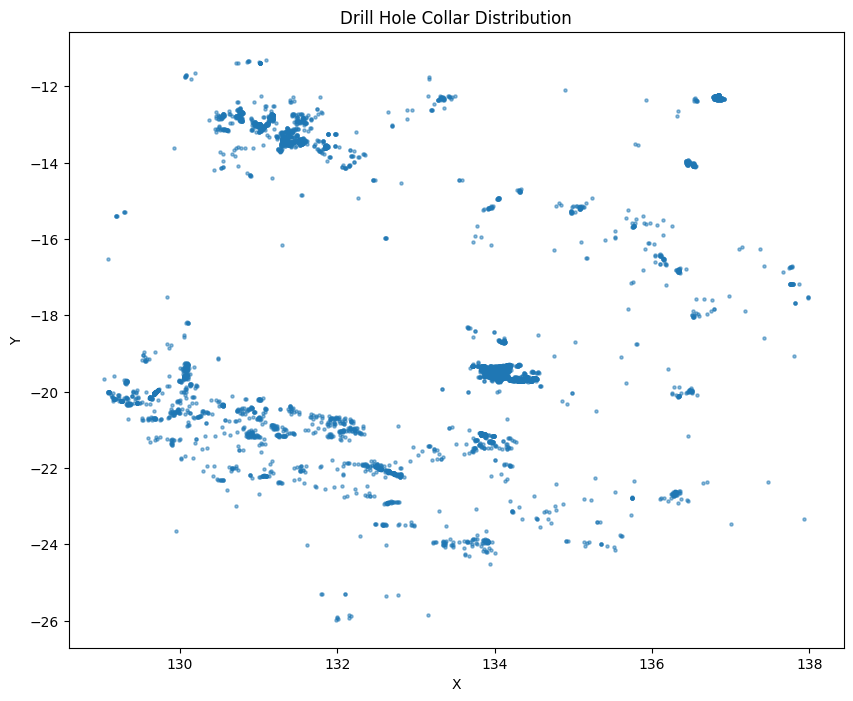

In [41]:
# Summary statistics
print(geo_df[["X", "Y", "TOTALDEPTH"]].describe())

# 3.2 2D scatter plot (sampled for speed)
sample_size = 5000
plot_df = geo_df.sample(sample_size, random_state=42) if len(geo_df)>sample_size else geo_df

plt.figure(figsize=(10,8))
plt.scatter(plot_df["X"], plot_df["Y"], s=5, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Drill Hole Collar Distribution")
plt.show()


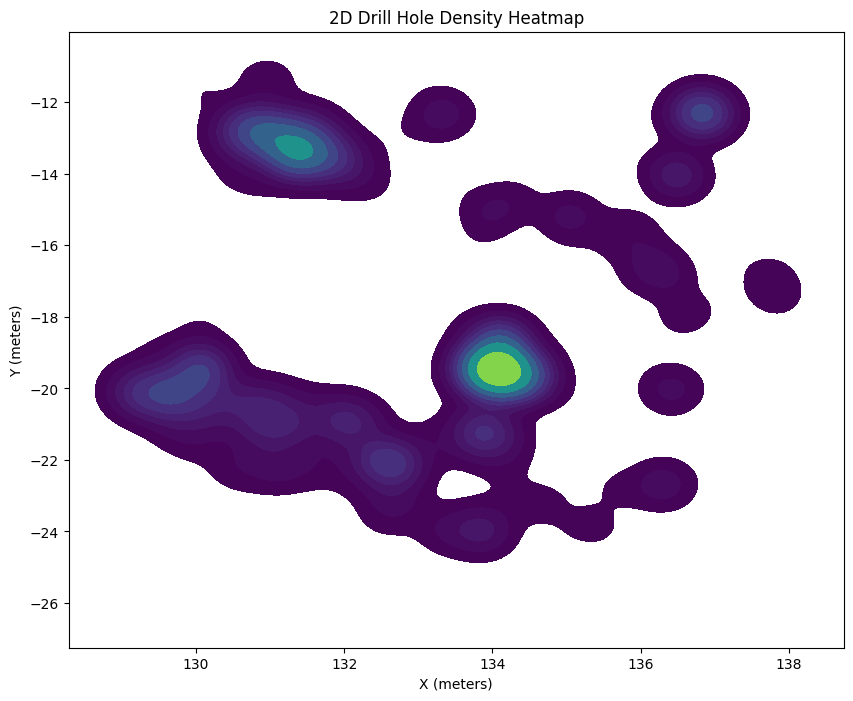

In [19]:
# Identify collars outside 1.5*IQR for X and Y
for col in ["X", "Y"]:
    Q1 = geo_df[col].quantile(0.25)
    Q3 = geo_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = geo_df[(geo_df[col] < Q1 - 1.5*IQR) | (geo_df[col] > Q3 + 1.5*IQR)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in X: 10
Number of outliers in Y: 0


In [20]:
from scipy.spatial import cKDTree
import numpy as np

coords = geo_df[["X", "Y"]].values
tree = cKDTree(coords)

# Query 1 nearest neighbor for each hole
distances, _ = tree.query(coords, k=2)  # k=2 includes self
geo_df["NN_DIST"] = distances[:, 1]     # take nearest neighbor distance excluding self

print("Nearest neighbor distance summary (meters):")
print(geo_df["NN_DIST"].describe())


Nearest neighbor distance summary (meters):
count    317923.000000
mean          0.001163
std           0.006976
min           0.000000
25%           0.000100
50%           0.000316
75%           0.000700
max           0.626263
Name: NN_DIST, dtype: float64


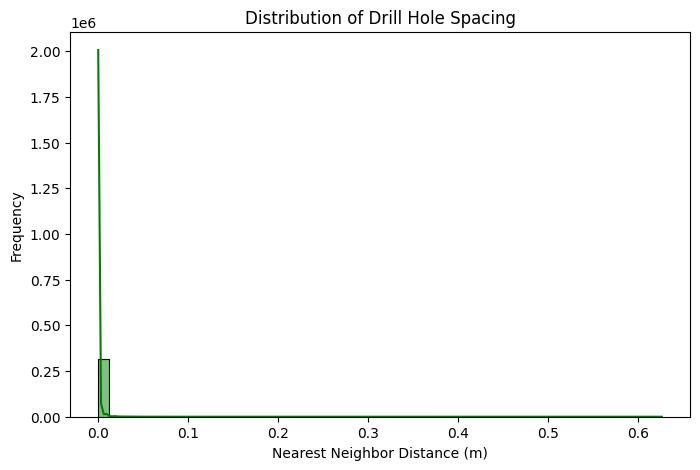

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(geo_df["NN_DIST"], bins=50, kde=True, color="green")
plt.xlabel("Nearest Neighbor Distance (m)")
plt.ylabel("Frequency")
plt.title("Distribution of Drill Hole Spacing")
plt.show()


In [22]:
# Define a search radius for density calculation (meters)
SEARCH_RADIUS = 250  # adjust based on your data


In [23]:
from scipy.spatial import cKDTree
import numpy as np

# Use 2D coordinates (X, Y)
coords = geo_df[["X", "Y"]].values

# Build the KD-tree
tree = cKDTree(coords)


In [24]:
# Define grid size (meters)
GRID_SIZE = 250

# Compute grid indices
geo_df["X_IDX"] = ((geo_df["X"] - geo_df["X"].min()) // GRID_SIZE).astype(int)
geo_df["Y_IDX"] = ((geo_df["Y"] - geo_df["Y"].min()) // GRID_SIZE).astype(int)

# Count points per grid cell
grid_counts = geo_df.groupby(["X_IDX", "Y_IDX"]).size().reset_index(name="CELL_COUNT")

# Merge counts back to holes
geo_df = geo_df.merge(grid_counts, on=["X_IDX", "Y_IDX"], how="left")


In [25]:
# Create a dictionary of grid counts
grid_dict = grid_counts.set_index(["X_IDX", "Y_IDX"])["CELL_COUNT"].to_dict()

def local_density(x_idx, y_idx):
    # Include 8 neighboring cells + self
    total = 0
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            total += grid_dict.get((x_idx+dx, y_idx+dy), 0)
    return total

# Vectorized application
geo_df["LOCAL_DENSITY"] = geo_df.apply(
    lambda row: local_density(row["X_IDX"], row["Y_IDX"]), axis=1
)


In [26]:
geo_df["DENSITY_NORM"] = geo_df["LOCAL_DENSITY"] / geo_df["LOCAL_DENSITY"].max()


In [27]:
if "TOTALDEPTH" in geo_df.columns:
    # Normalize depth to 0–1
    geo_df["DEPTH_WEIGHT"] = geo_df["TOTALDEPTH"] / geo_df["TOTALDEPTH"].max()

    # Weighted density: accounts for hole depth contribution
    geo_df["DENSITY_WEIGHTED"] = geo_df["DENSITY_NORM"] * geo_df["DEPTH_WEIGHT"]
else:
    # If no depth info, use unweighted density
    geo_df["DENSITY_WEIGHTED"] = geo_df["DENSITY_NORM"]


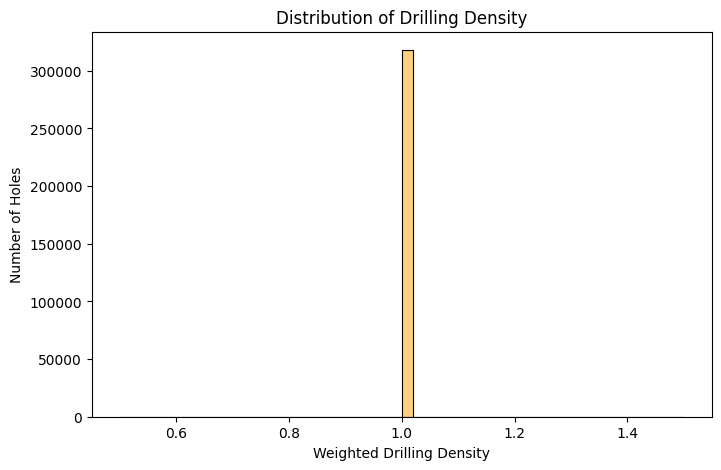

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(geo_df["DENSITY_WEIGHTED"], bins=50, kde=True, color="orange")
plt.xlabel("Weighted Drilling Density")
plt.ylabel("Number of Holes")
plt.title("Distribution of Drilling Density")
plt.show()


In [31]:
print(drillholes.columns.tolist())


['HOLE_ID', 'HOLE_NAME', 'METHOD', 'TYPE', 'TOTALDEPTH', 'LONGITUDE', 'LATITUDE', 'DT_COMPLTE', 'TITLE_ID', 'RP_ID', 'OPENFILE', 'HYLOGGED']


In [32]:
# Merge density values from geo_df back to the original drillholes dataframe
drillholes_conf = drillholes.merge(
    geo_df[["X", "Y", "DENSITY_WEIGHTED"]],
    left_on=["LONGITUDE", "LATITUDE"],   # original column names
    right_on=["X", "Y"],
    how="left"
)

# Drop temporary X/Y columns from merge
drillholes_conf = drillholes_conf.drop(columns=["X","Y"])


In [33]:
# scoring for METHOD
if "METHOD" in drillholes_conf.columns:
    method_scores = {"Diamond": 1.0, "RC": 0.8, "Auger": 0.5}
    drillholes_conf["METHOD_SCORE"] = drillholes_conf["METHOD"].map(method_scores).fillna(0.5)
else:
    drillholes_conf["METHOD_SCORE"] = 0.5

# scoring for TYPE
if "TYPE" in drillholes_conf.columns:
    type_scores = {"Exploration": 0.7, "Infill": 1.0, "Unknown": 0.5}
    drillholes_conf["TYPE_SCORE"] = drillholes_conf["TYPE"].map(type_scores).fillna(0.5)
else:
    drillholes_conf["TYPE_SCORE"] = 0.5

# scoring for logging completeness
if "HYLOGGED" in drillholes_conf.columns:
    drillholes_conf["LOGGING_SCORE"] = drillholes_conf["HYLOGGED"].apply(lambda x: 1.0 if x=="Yes" else 0.5)
else:
    drillholes_conf["LOGGING_SCORE"] = 0.5


In [34]:
W_DENSITY = 0.6
W_METHOD  = 0.2
W_TYPE    = 0.1
W_LOG     = 0.1

drillholes_conf["CONFIDENCE_SCORE"] = (
    W_DENSITY * drillholes_conf["DENSITY_WEIGHTED"] +
    W_METHOD  * drillholes_conf["METHOD_SCORE"] +
    W_TYPE    * drillholes_conf["TYPE_SCORE"] +
    W_LOG     * drillholes_conf["LOGGING_SCORE"]
)

# Optional normalization
drillholes_conf["CONFIDENCE_SCORE"] /= drillholes_conf["CONFIDENCE_SCORE"].max()


In [35]:
def classify_confidence(score):
    if score >= 0.8:
        return "Very High"
    elif score >= 0.6:
        return "High"
    elif score >= 0.4:
        return "Moderate"
    elif score >= 0.2:
        return "Low"
    else:
        return "Very Low"

drillholes_conf["CONFIDENCE_CLASS"] = drillholes_conf["CONFIDENCE_SCORE"].apply(classify_confidence)


In [37]:
# CLEAN AND PREPARE SPATIAL DATA

# Rename LONGITUDE/LATITUDE to X/Y for consistency
geo_df = drillholes.rename(columns={"LONGITUDE":"X", "LATITUDE":"Y"})

# Ensure depth column exists
if "TOTALDEPTH" not in geo_df.columns:
    geo_df["TOTALDEPTH"] = 1.0  # placeholder if no depth

# Drop rows with missing spatial coordinates
geo_df = geo_df.dropna(subset=["X", "Y"])
geo_df = geo_df.reset_index(drop=True)

print("Drill holes after cleaning:", len(geo_df))


Drill holes after cleaning: 317923


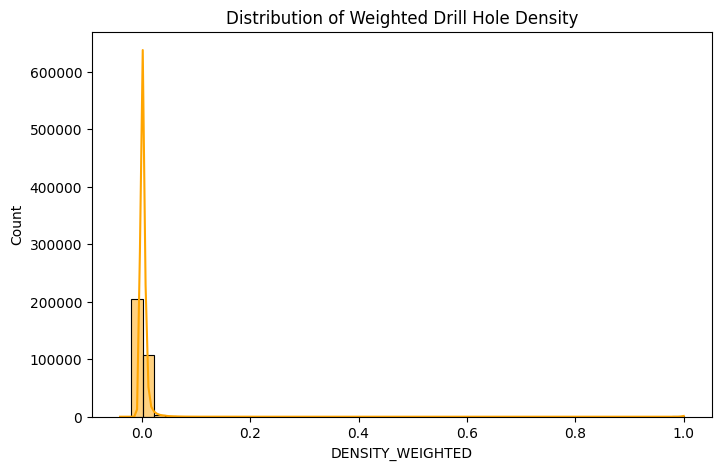

In [44]:
# 4.1 Define grid size (meters)
GRID_SIZE = 250  # adjust based on typical spacing

# 4.2 Assign holes to grid cells
geo_df["X_IDX"] = ((geo_df["X"] - geo_df["X"].min()) // GRID_SIZE).astype(int)
geo_df["Y_IDX"] = ((geo_df["Y"] - geo_df["Y"].min()) // GRID_SIZE).astype(int)

# 4.3 Count holes per grid cell
grid_counts = geo_df.groupby(["X_IDX","Y_IDX"]).size().reset_index(name="CELL_COUNT")

# 4.4 Merge counts back to holes
geo_df = geo_df.merge(grid_counts, on=["X_IDX","Y_IDX"], how="left")

# 4.5 Include neighboring cells for smooth density
grid_dict = grid_counts.set_index(["X_IDX","Y_IDX"])["CELL_COUNT"].to_dict()

def compute_local_density(x_idx, y_idx):
    total = 0
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            total += grid_dict.get((x_idx+dx, y_idx+dy), 0)
    return total

geo_df["LOCAL_DENSITY"] = geo_df.apply(lambda row: compute_local_density(row["X_IDX"], row["Y_IDX"]), axis=1)

# 4.6 Normalize density
geo_df["DENSITY_NORM"] = geo_df["LOCAL_DENSITY"] / geo_df["LOCAL_DENSITY"].max()

# 4.7 Optional depth weighting
geo_df["DEPTH_WEIGHT"] = geo_df["TOTALDEPTH"] / geo_df["TOTALDEPTH"].max()
geo_df["DENSITY_WEIGHTED"] = geo_df["DENSITY_NORM"] * geo_df["DEPTH_WEIGHT"]

# 4.8 Visualize weighted density
plt.figure(figsize=(8,5))
sns.histplot(geo_df["DENSITY_WEIGHTED"], bins=50, kde=True, color="orange")
plt.title("Distribution of Weighted Drill Hole Density")
plt.show()


   CONFIDENCE_SCORE CONFIDENCE_CLASS
0          0.352001              Low
1          0.355075              Low
2          0.354635              Low
3          0.354635              Low
4          0.356392              Low
CONFIDENCE_CLASS
Low          650350
Very High      2839
Moderate        290
High              6
Name: count, dtype: int64


/tmp/ipython-input-2138329551.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=drillholes_conf, x="CONFIDENCE_CLASS",


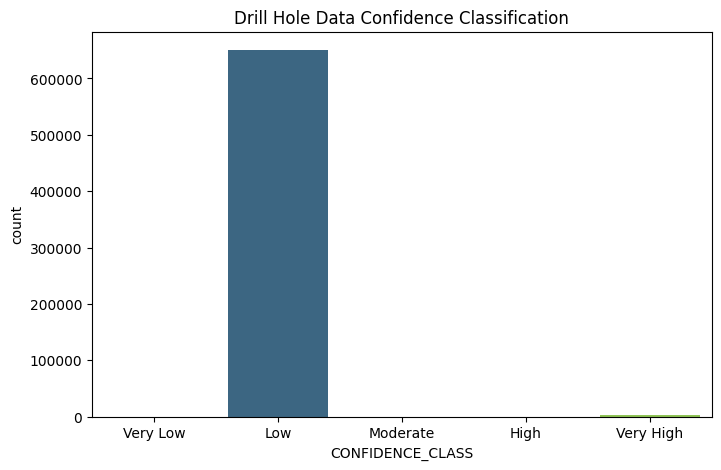

In [45]:
# DATA-CONFIDENCE SCORE CALCULATION

drillholes_conf = drillholes.merge(
    geo_df[["X","Y","DENSITY_WEIGHTED"]],
    left_on=["LONGITUDE","LATITUDE"],
    right_on=["X","Y"],
    how="left"
).drop(columns=["X","Y"])

# 5.2 Assign scores based on available metadata

# METHOD/DRILL_METHOD scoring
if "METHOD" in drillholes_conf.columns:
    method_scores = {"Diamond":1.0, "RC":0.8, "Auger":0.5}
    drillholes_conf["METHOD_SCORE"] = drillholes_conf["METHOD"].map(method_scores).fillna(0.5)
else:
    drillholes_conf["METHOD_SCORE"] = 0.5

# TYPE scoring
if "TYPE" in drillholes_conf.columns:
    type_scores = {"Exploration":0.7, "Infill":1.0, "Unknown":0.5}
    drillholes_conf["TYPE_SCORE"] = drillholes_conf["TYPE"].map(type_scores).fillna(0.5)
else:
    drillholes_conf["TYPE_SCORE"] = 0.5

# Logging completeness
if "HYLOGGED" in drillholes_conf.columns:
    drillholes_conf["LOGGING_SCORE"] = drillholes_conf["HYLOGGED"].apply(lambda x: 1.0 if x=="Yes" else 0.5)
else:
    drillholes_conf["LOGGING_SCORE"] = 0.5

# 5.3 Compute final confidence score
W_DENSITY = 0.6
W_METHOD  = 0.2
W_TYPE    = 0.1
W_LOG     = 0.1

drillholes_conf["CONFIDENCE_SCORE"] = (
    W_DENSITY * drillholes_conf["DENSITY_WEIGHTED"] +
    W_METHOD  * drillholes_conf["METHOD_SCORE"] +
    W_TYPE    * drillholes_conf["TYPE_SCORE"] +
    W_LOG     * drillholes_conf["LOGGING_SCORE"]
)

# Normalize just in case
drillholes_conf["CONFIDENCE_SCORE"] /= drillholes_conf["CONFIDENCE_SCORE"].max()

# 5.4 Classify into qualitative categories
def classify_confidence(score):
    if score>=0.8: return "Very High"
    elif score>=0.6: return "High"
    elif score>=0.4: return "Moderate"
    elif score>=0.2: return "Low"
    else: return "Very Low"

drillholes_conf["CONFIDENCE_CLASS"] = drillholes_conf["CONFIDENCE_SCORE"].apply(classify_confidence)

# 5.5 Quick check
print(drillholes_conf[["CONFIDENCE_SCORE","CONFIDENCE_CLASS"]].head())
print(drillholes_conf["CONFIDENCE_CLASS"].value_counts())

# Optional visualization
plt.figure(figsize=(8,5))
sns.countplot(data=drillholes_conf, x="CONFIDENCE_CLASS",
              order=["Very Low","Low","Moderate","High","Very High"],
              palette="viridis")
plt.title("Drill Hole Data Confidence Classification")
plt.show()


In [46]:
# Import Plotly for interactive 3D plotting
import plotly.express as px

# Check what columns are available just to make sure we can plot
print("Available columns:", drillholes_conf.columns.tolist())

# Sampling the dataset for faster plotting. 50k points is smooth, adjust if your machine can handle more.
sample_size = 50000
plot_df = drillholes_conf.sample(sample_size, random_state=42) if len(drillholes_conf) > sample_size else drillholes_conf

# Create a 3D scatter plot showing drill holes with weighted density as color
# X = Longitude, Y = Latitude, Z = Depth, color = DENSITY_WEIGHTED
fig = px.scatter_3d(
    plot_df,
    x="LONGITUDE",
    y="LATITUDE",
    z="TOTALDEPTH",
    color="DENSITY_WEIGHTED",
    color_continuous_scale="Viridis",
    size_max=5,
    opacity=0.7,
    hover_data=["HOLE_ID", "METHOD", "TYPE"]
)

# Label axes and set a descriptive title
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Depth'
    ),
    title="3D Drill Hole Density Visualization",
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()


Available columns: ['HOLE_ID', 'HOLE_NAME', 'METHOD', 'TYPE', 'TOTALDEPTH', 'LONGITUDE', 'LATITUDE', 'DT_COMPLTE', 'TITLE_ID', 'RP_ID', 'OPENFILE', 'HYLOGGED', 'DENSITY_WEIGHTED', 'METHOD_SCORE', 'TYPE_SCORE', 'LOGGING_SCORE', 'CONFIDENCE_SCORE', 'CONFIDENCE_CLASS']


In [47]:
# 3D scatter plot for confidence scores
fig_conf = px.scatter_3d(
    plot_df,
    x="LONGITUDE",
    y="LATITUDE",
    z="TOTALDEPTH",
    color="CONFIDENCE_SCORE",
    color_continuous_scale="Turbo",
    size_max=5,
    opacity=0.7,
    hover_data=["HOLE_ID", "CONFIDENCE_CLASS"]
)

# Label axes and give the plot a title
fig_conf.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Depth'
    ),
    title="3D Drill Hole Confidence Visualization",
    margin=dict(l=0, r=0, b=0, t=30)
)

fig_conf.show()


In [53]:
# check the main stats of drill hole confidence
print("Summary of drill hole confidence scores:")
print(drillholes_conf["CONFIDENCE_SCORE"].describe())

print("\nConfidence class counts:")
print(drillholes_conf["CONFIDENCE_CLASS"].value_counts())

# Check block-level confidence
print("\nBlock model confidence stats:")
print(block_confidence["CONFIDENCE_SCORE"].describe())

# Export drill holes with confidence for later use or geostatistics
drillholes_conf.to_csv("DrillHoles_Confidence.csv", index=False)
print("Drill holes with confidence scores exported to 'DrillHoles_Confidence.csv'.")

# Export 3D block model for geostatistical modeling
block_confidence.to_csv("BlockModel_Confidence.csv", index=False)
print("3D block model exported to 'BlockModel_Confidence.csv'.")


Summary of drill hole confidence scores:
count    653485.000000
mean          0.280671
std           0.052983
min           0.244671
25%           0.268585
50%           0.268739
75%           0.269976
max           1.000000
Name: CONFIDENCE_SCORE, dtype: float64

Confidence class counts:
CONFIDENCE_CLASS
Low          650350
Very High      2839
Moderate        290
High              6
Name: count, dtype: int64

Block model confidence stats:
count    297.000000
mean       0.371933
std        0.091537
min        0.268952
25%        0.306057
50%        0.348290
75%        0.401031
max        1.000000
Name: CONFIDENCE_SCORE, dtype: float64
Drill holes with confidence scores exported to 'DrillHoles_Confidence.csv'.
3D block model exported to 'BlockModel_Confidence.csv'.


In [54]:
# Extract blocks with high or very high confidence
high_conf_blocks = block_confidence[block_confidence["CONFIDENCE_SCORE"] >= 0.6]

print(f"Number of high-confidence blocks: {len(high_conf_blocks)}")


Number of high-confidence blocks: 8


In [55]:
# Highlight blocks with many drill holes
dense_blocks = block_confidence[block_confidence["HOLE_COUNT"] >= 3]  # threshold adjustable
print(f"Number of dense blocks: {len(dense_blocks)}")


Number of dense blocks: 207


In [56]:
import geopandas as gpd


In [57]:
low_conf_blocks = block_confidence[block_confidence["CONFIDENCE_SCORE"] < 0.4]
print(f"Low-confidence blocks: {len(low_conf_blocks)}")


Low-confidence blocks: 221


In [58]:
# Simple prioritization score
block_confidence["PRIORITY"] = block_confidence["CONFIDENCE_SCORE"] * np.log1p(block_confidence["HOLE_COUNT"])

# Top 20 high-priority blocks
top_blocks = block_confidence.sort_values("PRIORITY", ascending=False).head(20)
print(top_blocks[["X_CENTER","Y_CENTER","Z_CENTER","CONFIDENCE_SCORE","HOLE_COUNT","PRIORITY"]])


     X_CENTER  Y_CENTER  Z_CENTER  CONFIDENCE_SCORE  HOLE_COUNT  PRIORITY
242   12.5541   99.0019    9995.0          0.999487        2832  7.945012
0     12.5541   99.0019       5.0          0.270868      426335  3.511251
1     12.5541   99.0019      15.0          0.275145       70752  3.072534
2     12.5541   99.0019      25.0          0.283040       31671  2.933196
3     12.5541   99.0019      35.0          0.290847       21819  2.905731
6     12.5541   99.0019      65.0          0.300331       15778  2.903135
4     12.5541   99.0019      45.0          0.297555       15197  2.865137
5     12.5541   99.0019      55.0          0.297069       11674  2.782114
7     12.5541   99.0019      75.0          0.305902        7416  2.726057
9     12.5541   99.0019      95.0          0.311422        4942  2.648869
10    12.5541   99.0019     105.0          0.316309        4189  2.638165
8     12.5541   99.0019      85.0          0.305427        4867  2.593207
12    12.5541   99.0019     125.0     

In [59]:
fig = px.scatter_3d(
    block_confidence,
    x="X_CENTER",
    y="Y_CENTER",
    z="Z_CENTER",
    color="CONFIDENCE_SCORE",
    size="HOLE_COUNT",
    color_continuous_scale="Turbo",
    opacity=0.7,
    hover_data=["CONFIDENCE_SCORE","HOLE_COUNT"]
)

fig.update_layout(title="Drill Hole Planning Zones", scene=dict(
    xaxis_title="Longitude", yaxis_title="Latitude", zaxis_title="Depth"))
fig.show()


In [60]:
block_confidence.to_csv("BlockModel_Planning.csv", index=False)
print("Planning block model exported for further mine planning or GIS use.")


Planning block model exported for further mine planning or GIS use.
